Notebook to examined 3.6 test runs

In [1]:
import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
d = nc.Dataset('/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6-test/SalishSea_1h_20020915_20020921_grid_T.nc')
sal = d.variables['vosaline'][:]
sal = np.ma.masked_values(sal,0)
deps = d.variables['deptht'][:]
temp = d.variables['votemper'][:]
temp = np.ma.masked_values(temp,0)
ssh = d.variables['sossheig'][:]

d = nc.Dataset('/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6-test/SalishSea_1h_20020915_20020921_grid_U.nc')
U = d.variables['vozocrtx'][:]
U = np.ma.masked_values(U,0)
depsU=d.variables['depthu'][:]


print d


<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    name: SalishSea_1h_20020915_20020921
    description: ocean U grid variables
    conventions: CF-1.1
    production: An IPSL model
    timeStamp: 2015-Aug-03 15:09:51 PDT
    dimensions(sizes): x(1100), y(10), depthu(40), time_counter(168), time_bounds(2)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 depthu(depth), float32 vozocrtx(time_counter,depth,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,time_bounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,time_bounds)
    groups: 



<matplotlib.colorbar.Colorbar instance at 0x7f53b5d6f998>

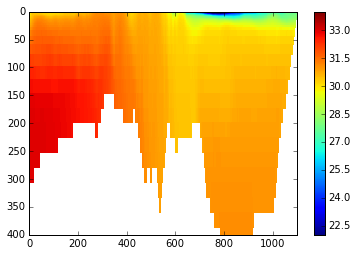

In [3]:
smin=22
smax=34
t=0
y=3
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f53b5dbb368>

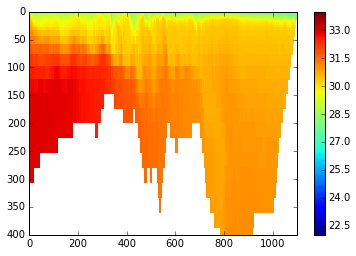

In [5]:
t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
plt.colorbar()


In [8]:
print sal[0,0,y,-1]
print sal[0,0,y,-2]
print sal[0,0,y,-3]

--
27.9117
27.8856


<matplotlib.colorbar.Colorbar instance at 0x7f53b5e55e18>

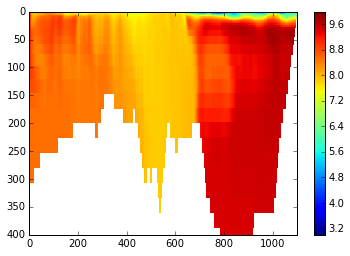

In [9]:
tmin=3; tmax=10
t=0
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x7f53aaf8a758>

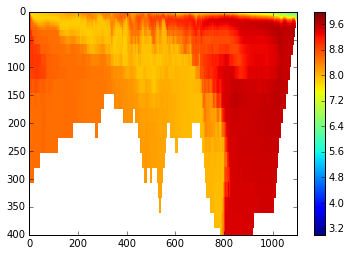

In [12]:

t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f53aae728c0>

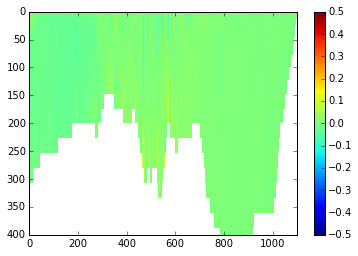

In [13]:
t=0
umin=-.5
umax=0.5
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f53aaac2a70>

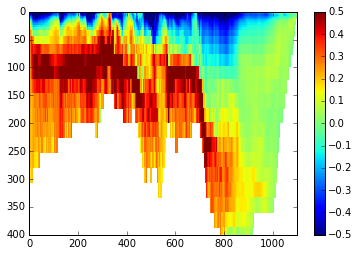

In [15]:
t=-1
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()


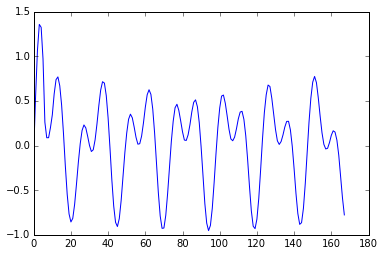

In [17]:
plt.plot(ssh[:,y,10])

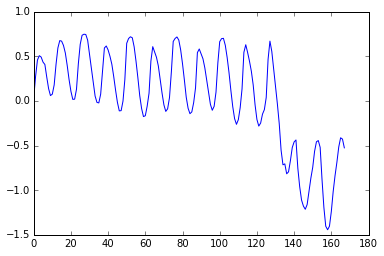

In [18]:
plt.plot(U[:,0,y,10])

Yay tides

<matplotlib.colorbar.Colorbar instance at 0x7f53aa913050>

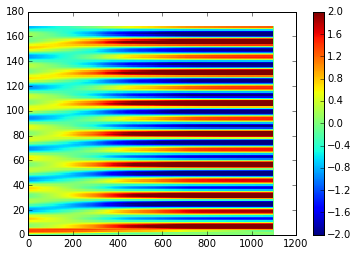

In [19]:
plt.pcolormesh(ssh[:,y,:],vmin=-2,vmax=2)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f53aa77de18>

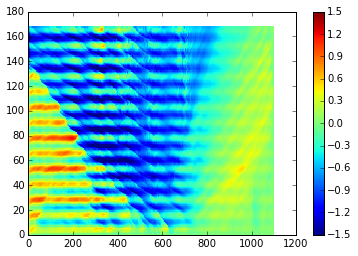

In [20]:
plt.pcolormesh(U[:,0,y,:],vmin=-1.5,vmax=1.5)
plt.colorbar()

It doesn't look like there is a tidal response in U. Did I miss fixing a flag in NEMO 3.6?